In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import squarify
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

plt.style.use('ggplot')


# NLP
import nltk
import swifter
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

import datetime as dt
from datetime import datetime
from tqdm import tqdm
import os
import platform
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
PROJECT_ROOT_DIR ="."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [3]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)       

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [4]:
path = Fontmanager()

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [5]:
data0910 = pd.read_csv("dataset/data0910.csv")
data1011 = pd.read_csv("dataset/data1011.csv")

In [6]:
data = pd.concat([data0910, data1011], axis=0)

In [7]:
data = data.drop_duplicates()

In [8]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

data['total_price'] = data['Quantity'] * data['Price']

In [11]:
# 2009년 12월 부터 2011년 12월 9일까지 
# 2010년 데이터만 사용
data = data[data['year'] == 2010]

In [12]:
data.describe()

Quantity          Price    Customer ID      year          month  \
count  391358.000000  391358.000000  391358.000000  391358.0  391358.000000   
mean       12.952997       3.931421   15347.438535    2010.0       7.164923   
std       103.232102      73.348625    1683.454834       0.0       3.400561   
min     -9360.000000       0.000000   12346.000000    2010.0       1.000000   
25%         2.000000       1.250000   13975.000000    2010.0       4.000000   
50%         5.000000       1.950000   15303.000000    2010.0       8.000000   
75%        12.000000       3.750000   16797.000000    2010.0      10.000000   
max     19152.000000   25111.090000   18287.000000    2010.0      12.000000   

                 day        quarter    total_price  
count  391358.000000  391358.000000  391358.000000  
mean       15.821110       2.722768      20.195580  
std         8.643125       1.138545     102.081326  
min         1.000000       1.000000  -25111.090000  
25%         8.000000       2.000000       4.560000  
50%        16.000000       3.000000      11.800000  
75%        23.000000       4.000000      19.500000  
max        31.000000       4.000000   15818.400000

### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [13]:
tmp = data[data['Quantity'] < 0]
tmp[tmp['Invoice'].str.find("C") == 0]

Invoice StockCode                         Description  Quantity  \
45229  C493411     21539             RETRO SPOTS BUTTER DISH        -1   
45240  C493415     21527      RETRO SPOT TRADITIONAL TEAPOT         -3   
45241  C493426     22109        FULL ENGLISH BREAKFAST PLATE        -1   
45284  C493430     21556        CERAMIC STRAWBERRY MONEY BOX        -1   
45285  C493430     21232      STRAWBERRY CERAMIC TRINKET BOX        -2   
...        ...       ...                                 ...       ...   
41622  C539950    85099C      JUMBO  BAG BAROQUE BLACK WHITE        -1   
41623  C539950    85099B             JUMBO BAG RED RETROSPOT       -10   
41624  C539950     22720   SET OF 3 CAKE TINS PANTRY DESIGN         -2   
41696  C539956    35004C     SET OF 3 COLOURED  FLYING DUCKS       -15   
42331  C539983     82483  WOOD 2 DRAWER CABINET WHITE FINISH        -6   

            InvoiceDate  Price  Customer ID         Country       date   time  \
45229     1/4/2010 9:43   4.25      14590.0  United Kingdom 2010-01-04   9:43   
45240    1/4/2010 10:33   7.95      14590.0  United Kingdom 2010-01-04  10:33   
45241    1/4/2010 10:41   3.39      16550.0  United Kingdom 2010-01-04  10:41   
45284    1/4/2010 11:43   2.55      14680.0  United Kingdom 2010-01-04  11:43   
45285    1/4/2010 11:43   1.25      14680.0  United Kingdom 2010-01-04  11:43   
...                 ...    ...          ...             ...        ...    ...   
41622  12/23/2010 11:50   1.95      13534.0  United Kingdom 2010-12-23  11:50   
41623  12/23/2010 11:50   1.95      13534.0  United Kingdom 2010-12-23  11:50   
41624  12/23/2010 11:50   4.95      13534.0  United Kingdom 2010-12-23  11:50   
41696  12/23/2010 12:55   4.65      12980.0  United Kingdom 2010-12-23  12:55   
42331  12/23/2010 14:49   4.95      15856.0  United Kingdom 2010-12-23  14:49   

      hour  year  month  day  quarter   weekday  total_price  
45229    9  2010      1    4        1    Monday        -4.25  
45240   10  2010      1    4        1    Monday       -23.85  
45241   10  2010      1    4        1    Monday        -3.39  
45284   11  2010      1    4        1    Monday        -2.55  
45285   11  2010      1    4        1    Monday        -2.50  
...    ...   ...    ...  ...      ...       ...          ...  
41622   11  2010     12   23        4  Thursday        -1.95  
41623   11  2010     12   23        4  Thursday       -19.50  
41624   11  2010     12   23        4  Thursday        -9.90  
41696   12  2010     12   23        4  Thursday       -69.75  
42331   14  2010     12   23        4  Thursday       -29.70  

[9202 rows x 17 columns]

In [14]:
# cancel invoice 제외
data = data[~data["Invoice"].str.contains("C")]
data = data[data["Quantity"] > 0]

### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [15]:
# 문자로만
stockcode = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
stockcode['StockCode'].value_counts()

POST            727
M               418
C2              117
ADJUST           32
BANK CHARGES     19
PADS             14
TEST001           7
D                 5
ADJUST2           3
SP1002            2
Name: StockCode, dtype: int64

In [16]:
# stockcode 문자 dropna : 상품에 대한 것이 아니기 때문
data = data[~data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

### Price = 0 

In [17]:
zero = data[data['Price'] == 0]

### Country
 - 'Unspecified'가 있음

In [18]:
data[data['Country'] == 'Unspecified']

Invoice StockCode                        Description  Quantity  \
61394   494860     84832   ZINC WILLIE WINKIE  CANDLE STICK         5   
61395   494860     84836        ZINC METAL HEART DECORATION         5   
61396   494860    85014D   PINK/BROWN DOTS RUFFLED UMBRELLA         1   
61397   494860    85014A   BLACK/BLUE DOTS RUFFLED UMBRELLA         1   
61398   494860    85014B    RED/WHITE DOTS RUFFLED UMBRELLA         2   
...        ...       ...                                ...       ...   
499215  536012     79000                 MOROCCAN TEA GLASS        12   
499216  536012     22665  RECIPE BOX BLUE SKETCHBOOK DESIGN         6   
499217  536012     20886            BOX OF 9 PEBBLE CANDLES         6   
499218  536012     22424             ENAMEL BREAD BIN CREAM         1   
499219  536012     22441  GROW YOUR OWN BASIL IN ENAMEL MUG         8   

             InvoiceDate  Price  Customer ID      Country       date   time  \
61394    1/19/2010 11:01   0.85      12470.0  Unspecified 2010-01-19  11:01   
61395    1/19/2010 11:01   1.25      12470.0  Unspecified 2010-01-19  11:01   
61396    1/19/2010 11:01   5.95      12470.0  Unspecified 2010-01-19  11:01   
61397    1/19/2010 11:01   5.95      12470.0  Unspecified 2010-01-19  11:01   
61398    1/19/2010 11:01   5.95      12470.0  Unspecified 2010-01-19  11:01   
...                  ...    ...          ...          ...        ...    ...   
499215  11/29/2010 15:23   0.85      12351.0  Unspecified 2010-11-29  15:23   
499216  11/29/2010 15:23   2.95      12351.0  Unspecified 2010-11-29  15:23   
499217  11/29/2010 15:23   1.95      12351.0  Unspecified 2010-11-29  15:23   
499218  11/29/2010 15:23  12.75      12351.0  Unspecified 2010-11-29  15:23   
499219  11/29/2010 15:23   2.10      12351.0  Unspecified 2010-11-29  15:23   

       hour  year  month  day  quarter  weekday  total_price  
61394    11  2010      1   19        1  Tuesday         4.25  
61395    11  2010      1   19        1  Tuesday         6.25  
61396    11  2010      1   19        1  Tuesday         5.95  
61397    11  2010      1   19        1  Tuesday         5.95  
61398    11  2010      1   19        1  Tuesday        11.90  
...     ...   ...    ...  ...      ...      ...          ...  
499215   15  2010     11   29        4   Monday        10.20  
499216   15  2010     11   29        4   Monday        17.70  
499217   15  2010     11   29        4   Monday        11.70  
499218   15  2010     11   29        4   Monday        12.75  
499219   15  2010     11   29        4   Monday        16.80  

[277 rows x 17 columns]

### RFM analysis
- RFM analysis
    - Recency (affects retention, a measure of engagement)
    - Frequency (affects a customer’s lifetime value)
    - Monetary (affects a customer’s lifetime value)
    - Segment :
        - Champions: Bought recently, buy often and spend the most.
        - Loyal customers: Buy on a regular basis. Responsive to promotions.
        - Potential loyalist: Recent customers with average frequency.
        - New customers: Bought most recently, but not often.
        - Promising: Recent shoppers, but haven’t spent much.
        - Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
        - About to sleep: Below average recency and frequency. Will lose them if not reactivated.
        - At risk: Some time since they’ve purchased. Need to bring them back!
        - Can’t loose them: Used to purchase frequently but haven’t returned for a long time.
        - Hibernating: Last purchase was long back and low number of orders. May be lost.

In [19]:
data['date'].max()

Timestamp('2010-12-23 00:00:00')

In [20]:
# 기준 날짜 : 2010년 12월 24일 -> 가장 마지막 거래가 이루어진 날짜가 2010년 12월 23일이기 때문
standard_date = dt.datetime(2010, 12, 23)
RFM = data.groupby('Customer ID').agg({'date' : lambda date : (standard_date - date.max()).days,
                                'Invoice' : lambda Invoice : Invoice.nunique(),
                                'total_price' : lambda total_price : total_price.sum()})

RFM = RFM.reset_index()
RFM = RFM.rename(columns = {'date' : 'recency',
                     'Invoice' : 'frequency',
                     'total_price' : 'monetary'})

In [21]:
RFM[RFM['monetary'] < 0]

Empty DataFrame
Columns: [Customer ID, recency, frequency, monetary]
Index: []

In [22]:
# RFM Scores
RFM['R'] = pd.qcut(RFM['recency'], 5, labels=[5,4,3,2,1])
# 같은 개수로 나누고 싶은데 중복값이 있을 경우
RFM['F'] = pd.qcut(RFM['frequency'].rank(method="first"), 5, labels=[5,4,3,2,1])
RFM['M'] = pd.qcut(RFM['monetary'], 5, labels=[5,4,3,2,1])

In [23]:
# segment
# R,F 점수 이용
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t loose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
RFM['segment'] = RFM['R'].astype(str) + RFM['F'].astype(str)
RFM['segment'] = RFM['segment'].replace(segment_map, regex=True)

In [24]:
RFM_data = pd.merge(data, RFM, how="left")
RFM_data['Description'] = RFM_data['Description'].str.lower()

그림 저장: segment_count


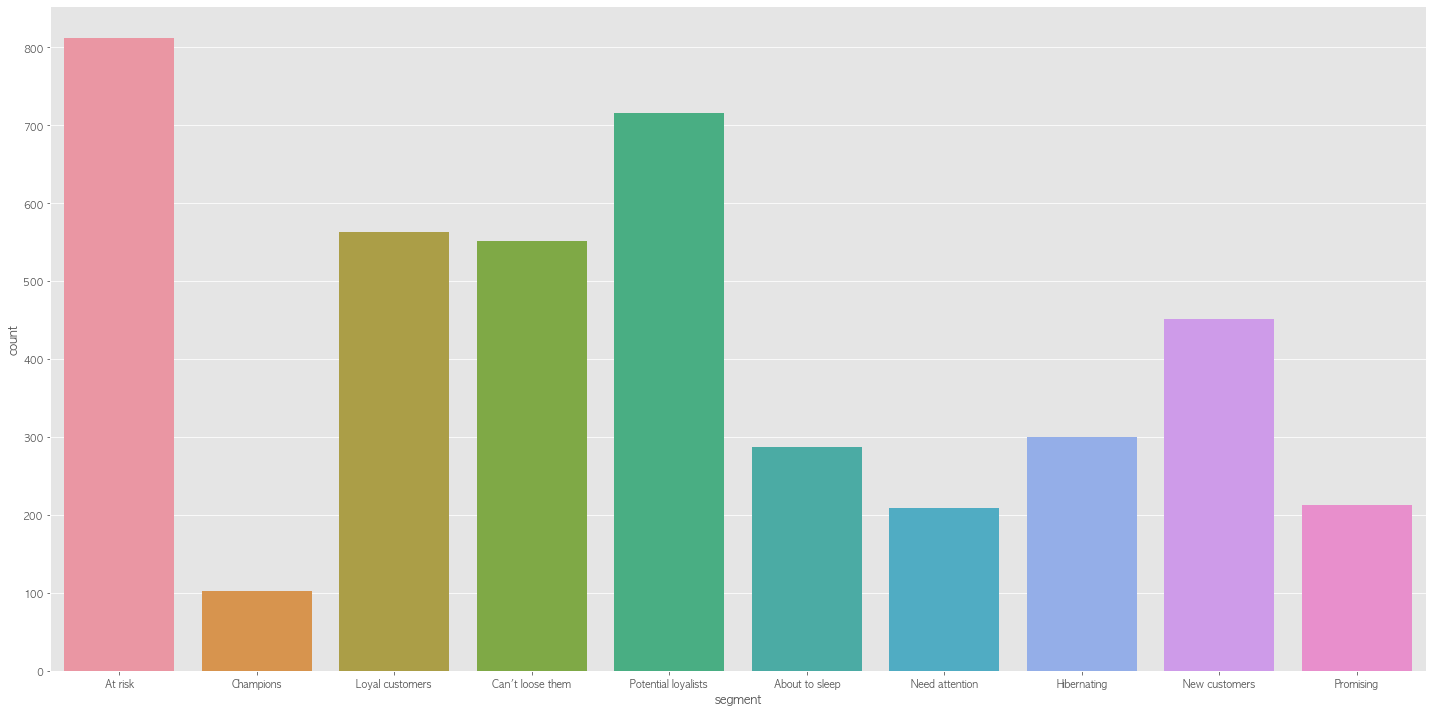

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(RFM['segment'])
save_fig("segment_count")
plt.show();

그림 저장: RFM Segments


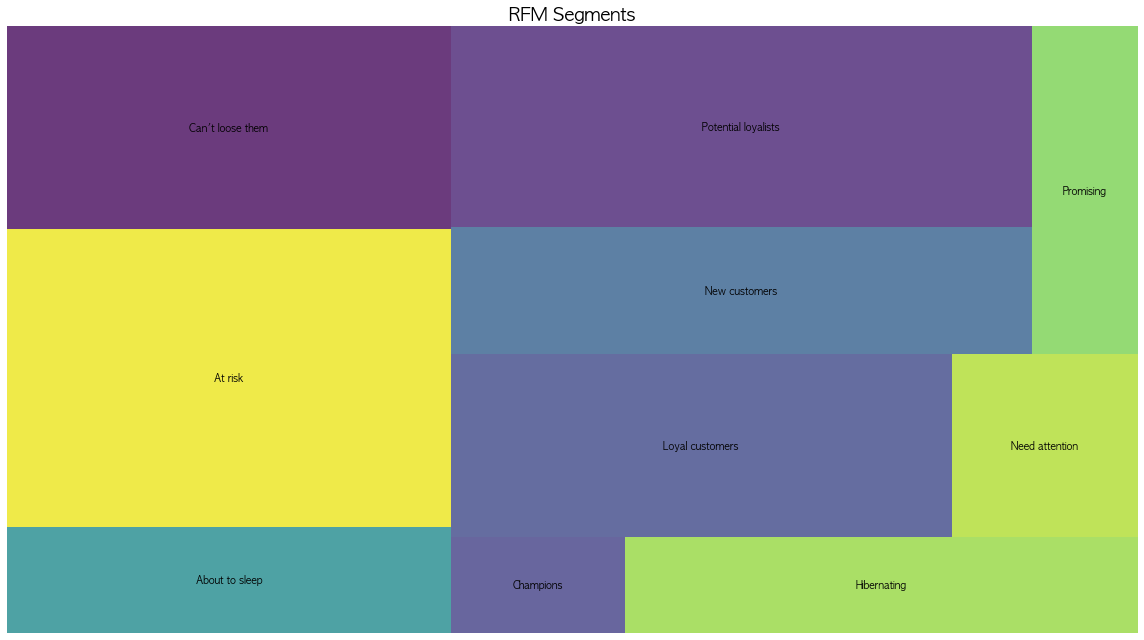

In [26]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
# color = 

squarify.plot(sizes=RFM.groupby('segment').count()['Customer ID'],
             label=RFM.groupby('segment').count()['Customer ID'].index,
             alpha=0.8)
plt.title("RFM Segments", fontsize=18)
plt.axis("off")
save_fig("RFM Segments")
plt.show();

그림 저장: recency


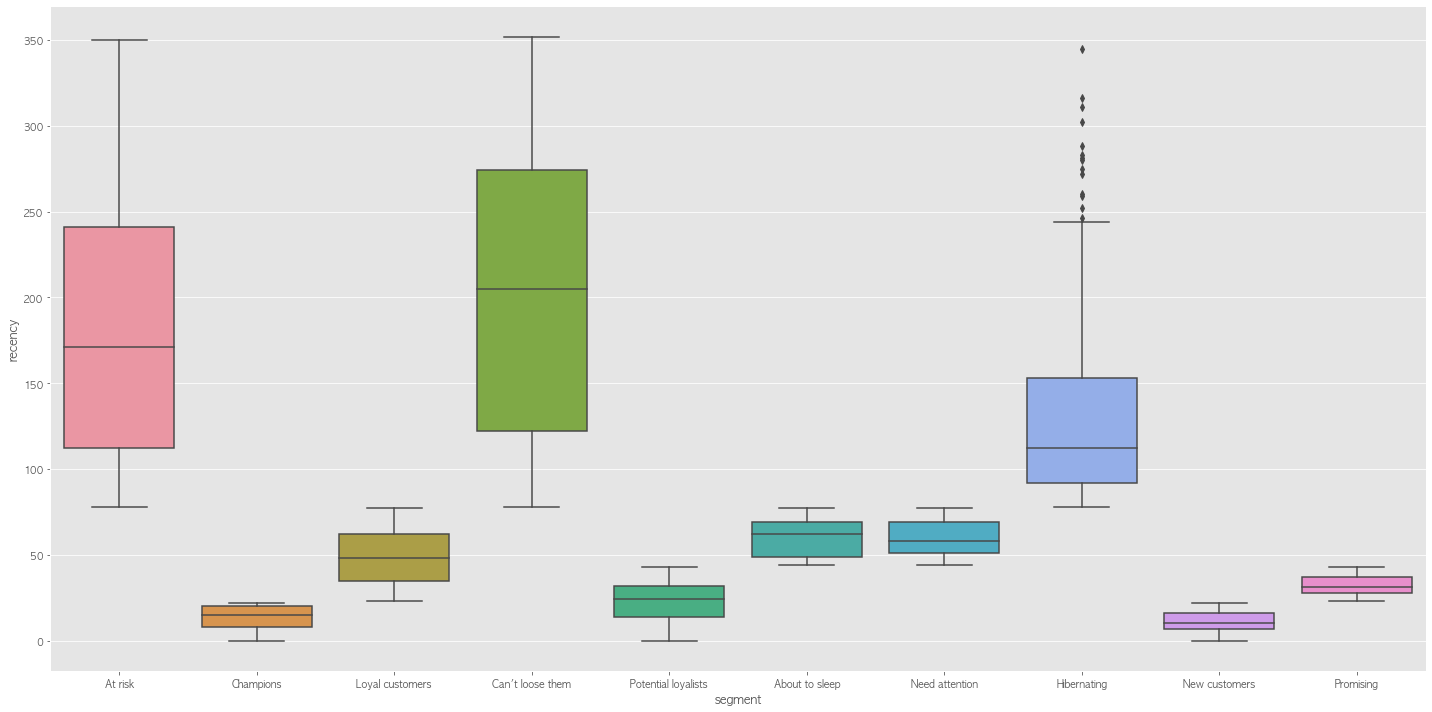

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=RFM['segment'], y=RFM['recency'])
save_fig("recency")
plt.show();

그림 저장: frequency


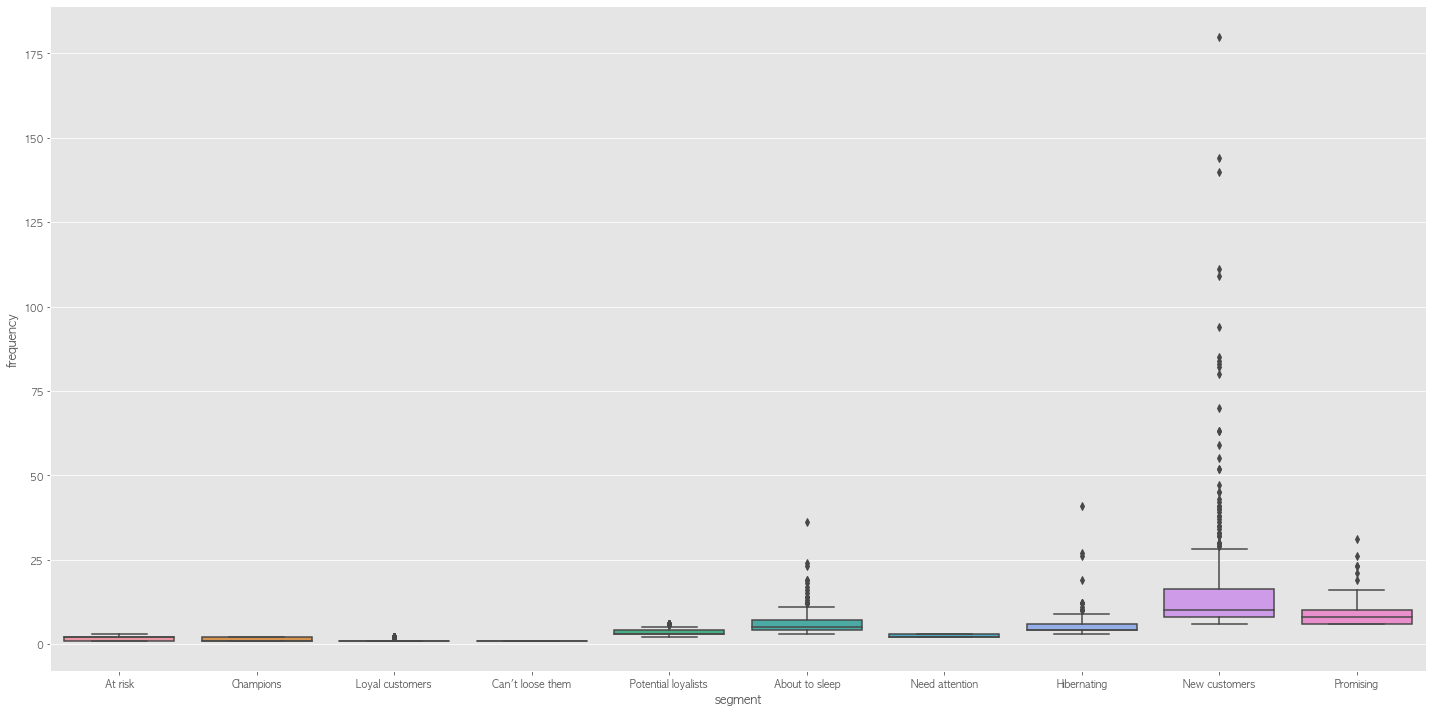

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=RFM['segment'], y=RFM['frequency'])
save_fig("frequency")
plt.show();

그림 저장: monetary


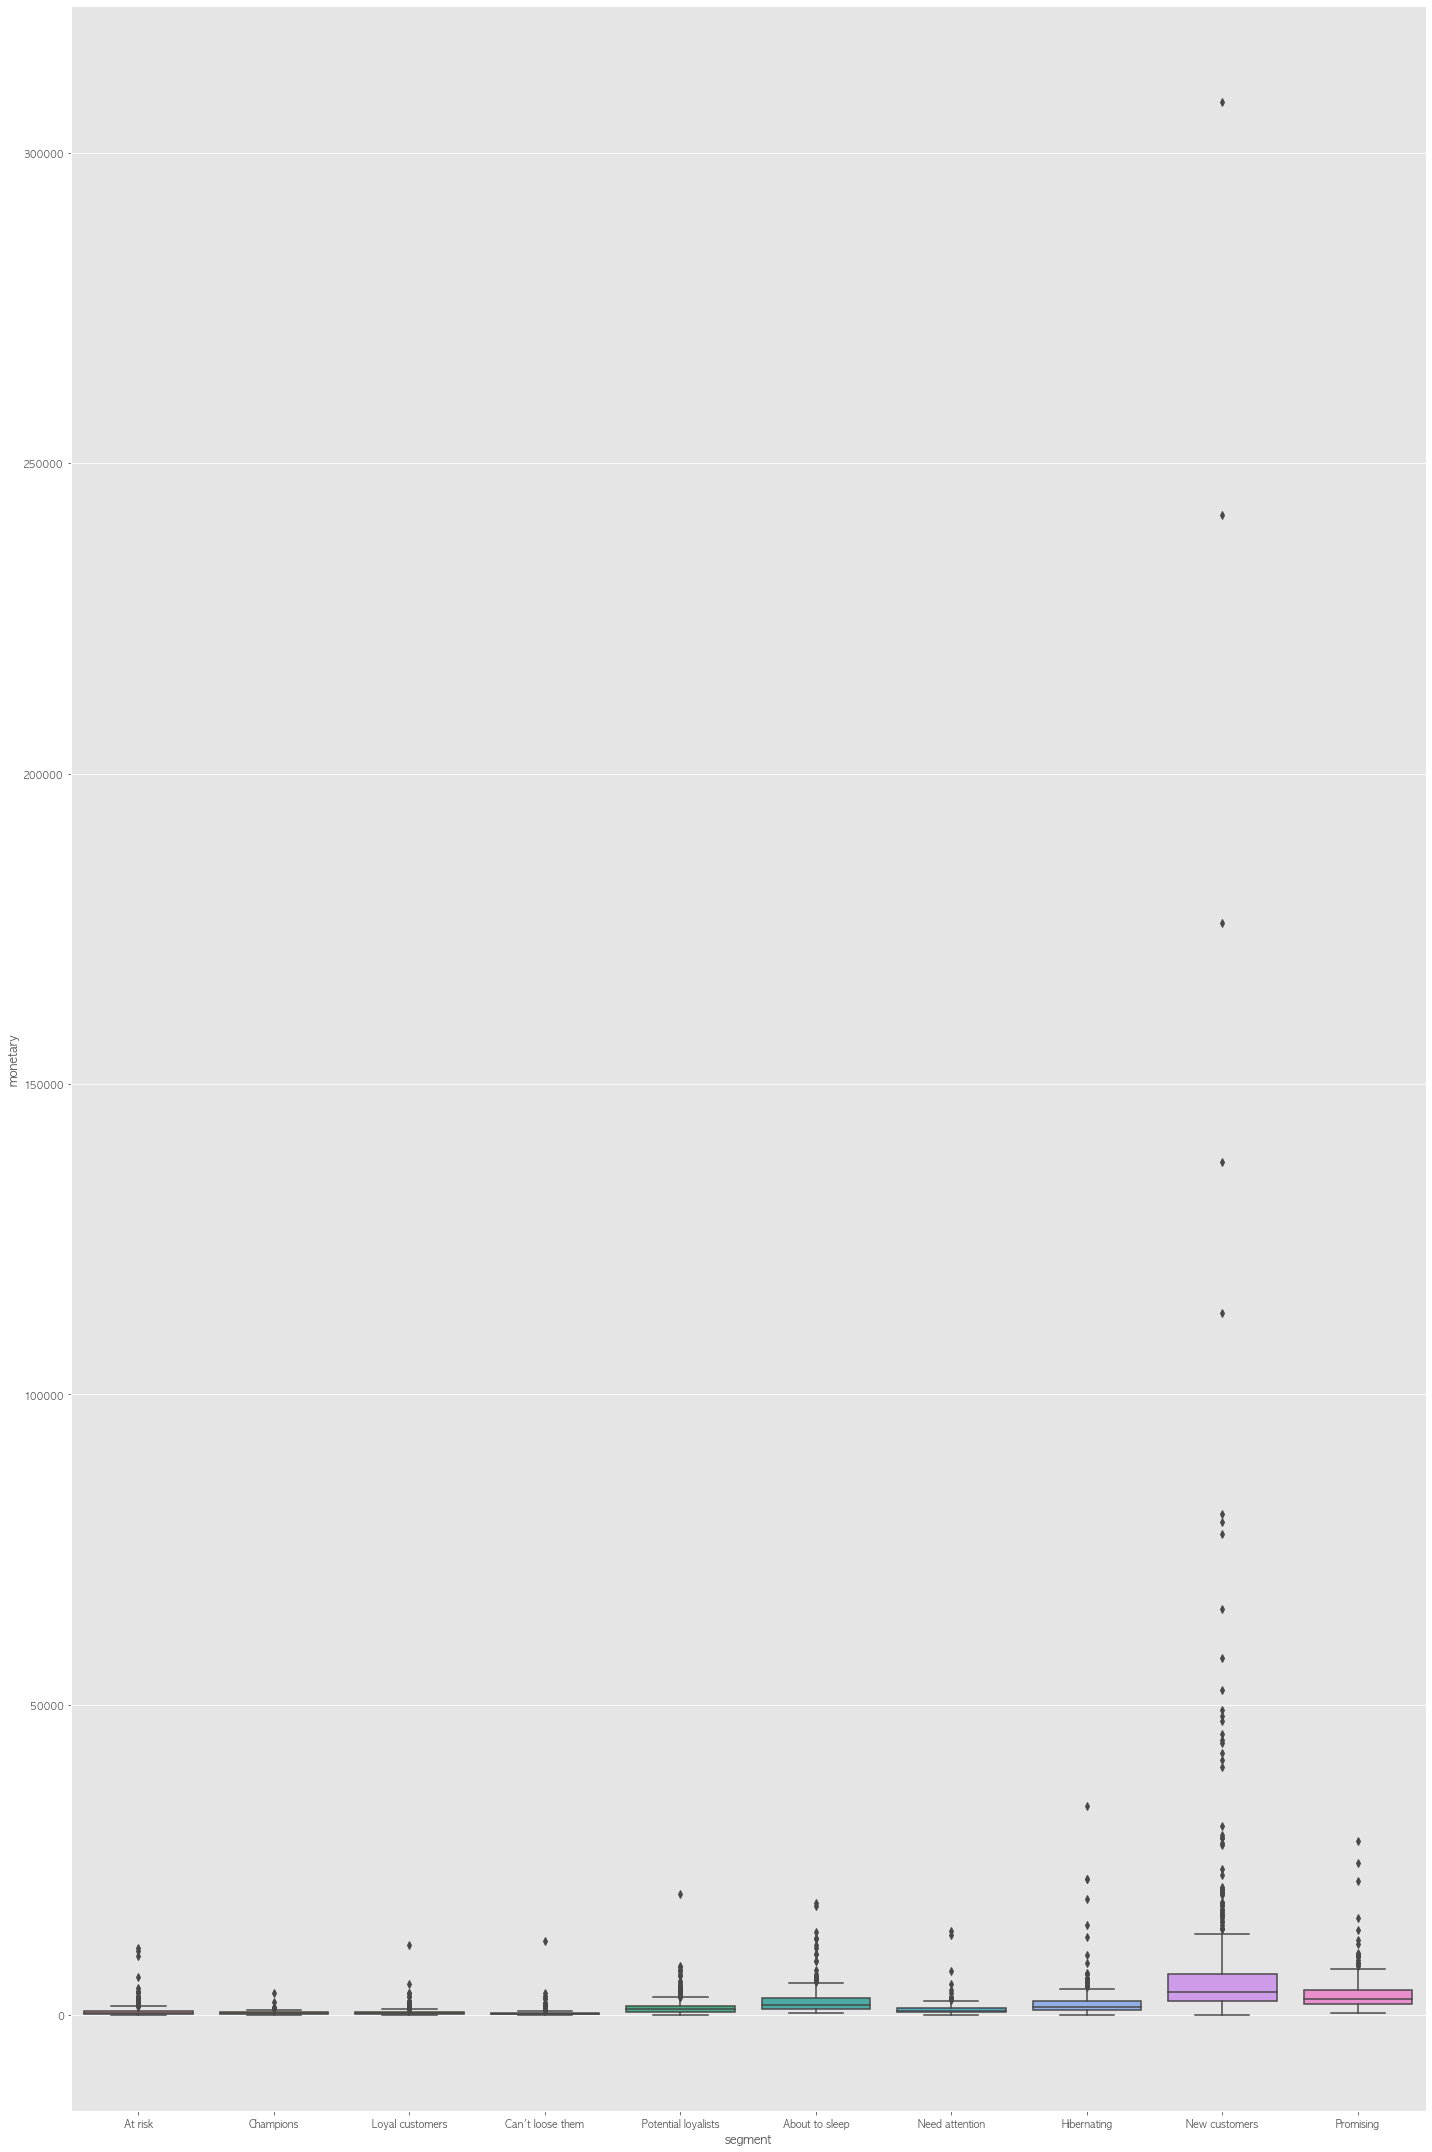

In [29]:
plt.figure(figsize=(20,30))
sns.boxplot(x=RFM['segment'], y=RFM['monetary'])
save_fig("monetary")
plt.show();

그림 저장: recency frequency segment scatter


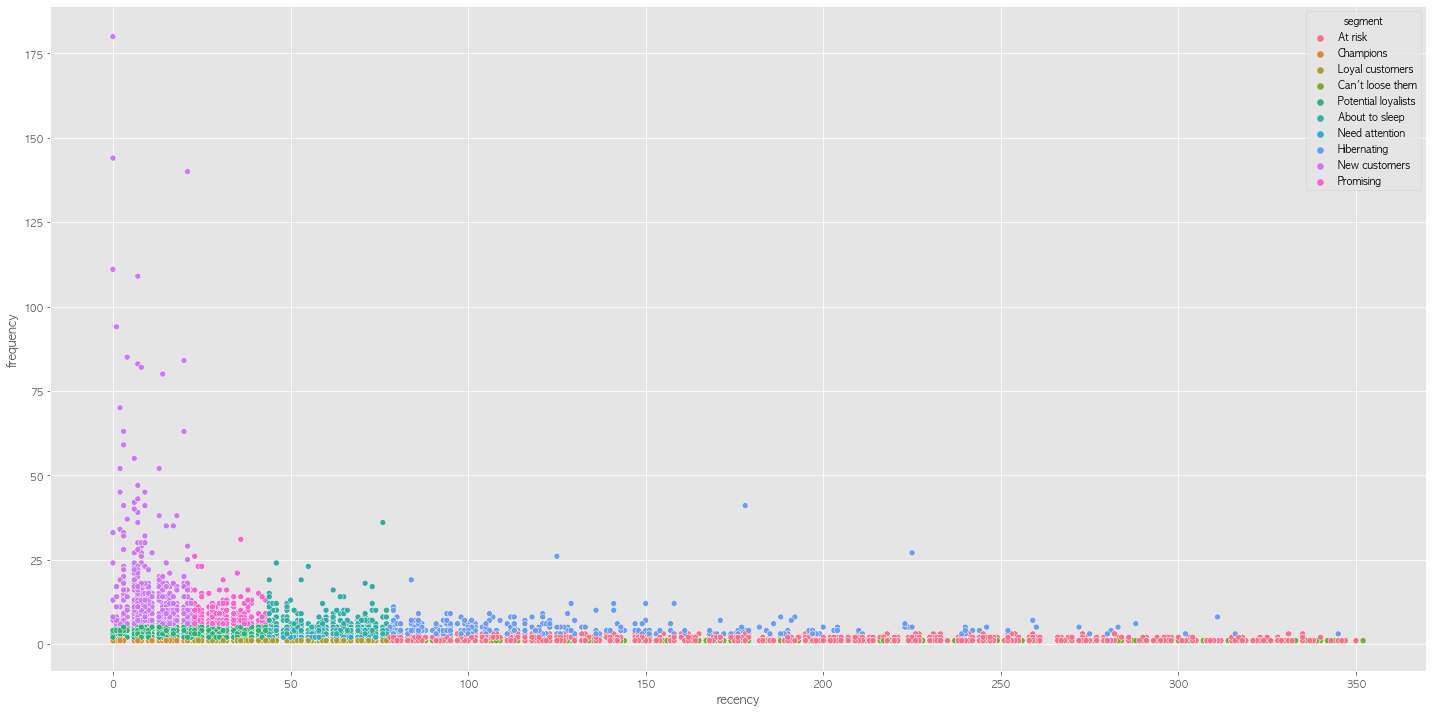

In [30]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=RFM['recency'], y=RFM['frequency'], hue=RFM['segment'])
save_fig("recency frequency segment scatter")
plt.show();

## Total
- 총 상품, 총 거래, 총 나라, 총 고객

In [31]:
total = pd.DataFrame({'total' : [len(RFM_data['StockCode'].value_counts()),
len(RFM_data['Invoice'].value_counts()),
len(RFM_data['Country'].value_counts()),
len(RFM_data['Customer ID'].value_counts())]}) 
total['category'] = ['products', 'transactions', 'countries', 'customers']

그림 저장: total


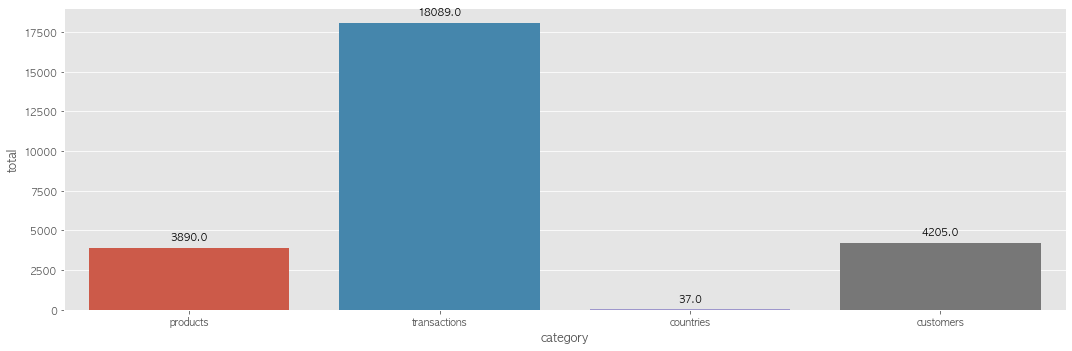

In [32]:
fig, ax = plt.subplots(1, figsize=(15,5))
sns.barplot(x=total['category'], y=total['total'], ax=ax)
add_value_labels(ax)
save_fig("total")
plt.show();

## Product

- 가장 많이 팔린 상품

그림 저장: most_sold_product


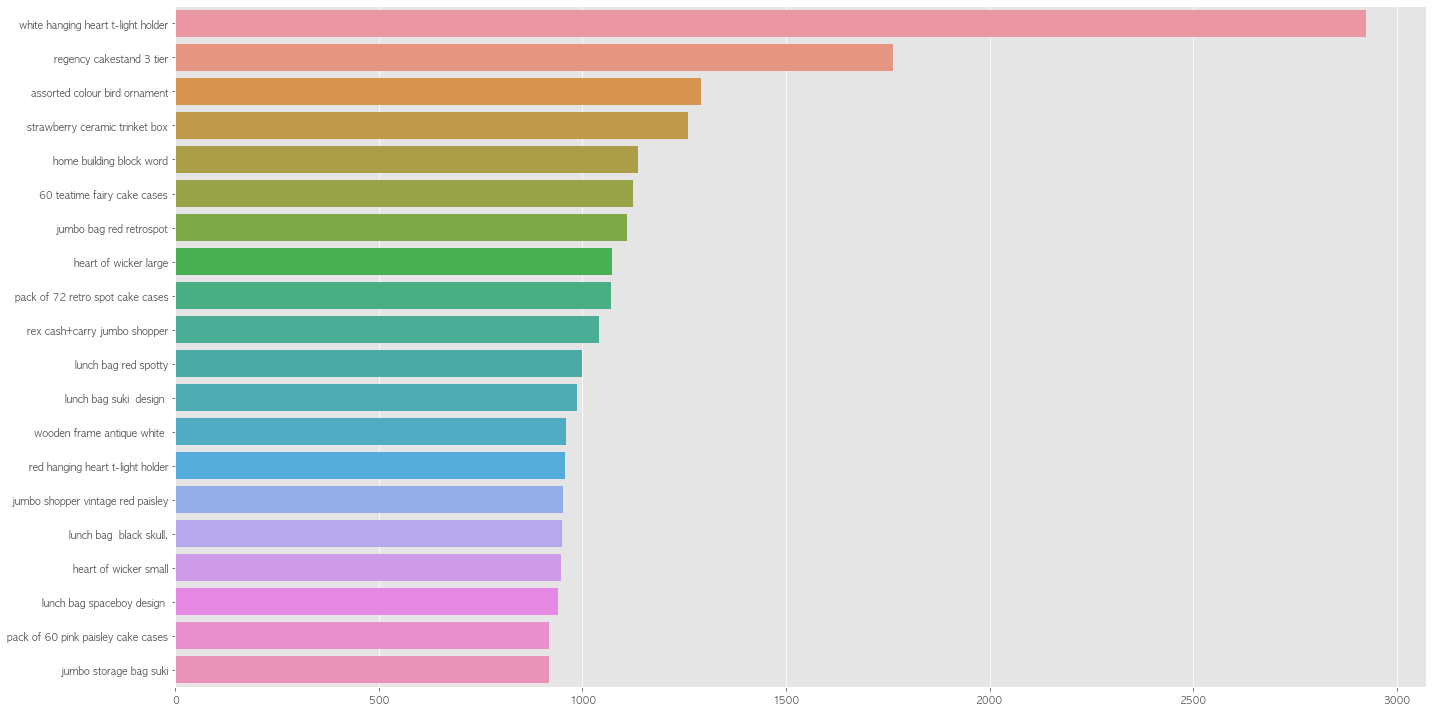

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x=RFM_data['Description'].value_counts().values[:20],
            y=RFM_data['Description'].value_counts().index[:20],
            orient='h')
save_fig("most_sold_product")
plt.show();

- 가장 많이 팔린 상품 by Customer Segments

그림 저장: most_sold_product_by_segments


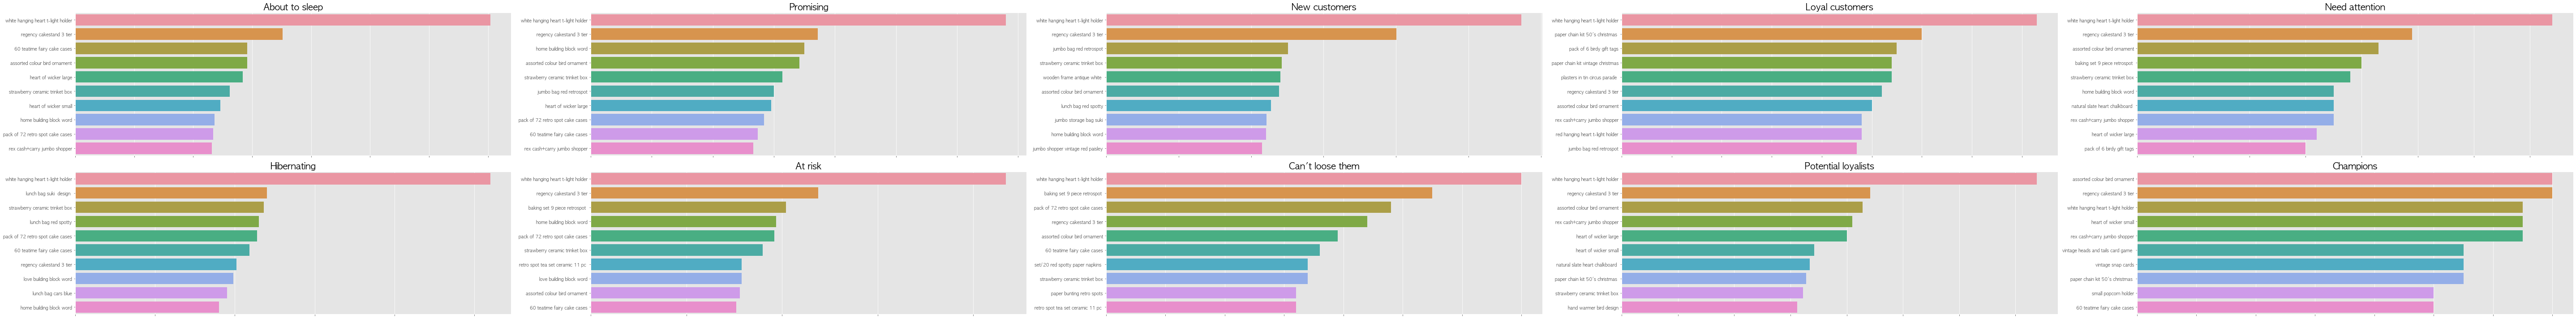

In [34]:
fig, ax = plt.subplots(2, 5, figsize=(80, 10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

for idx, var in enumerate(RFM_data['segment'].unique()):
    df = RFM_data[RFM_data['segment'] == var]
    
    
    i = idx % 2
    j = idx % 5
    
    sns.barplot(x=df['Description'].value_counts().values[:10],
                y=df['Description'].value_counts().index[:10],
                orient='h',
                ax = ax[i][j]).set_title(f'{var}'.format(), fontsize=20)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=30, size=15)
    ax[i][j].set_xlabel("")
    ax[i][j].set_ylabel("")
    
save_fig("most_sold_product_by_segments")
plt.show();

- 가장 비싼 상품

그림 저장: most_expensive_product


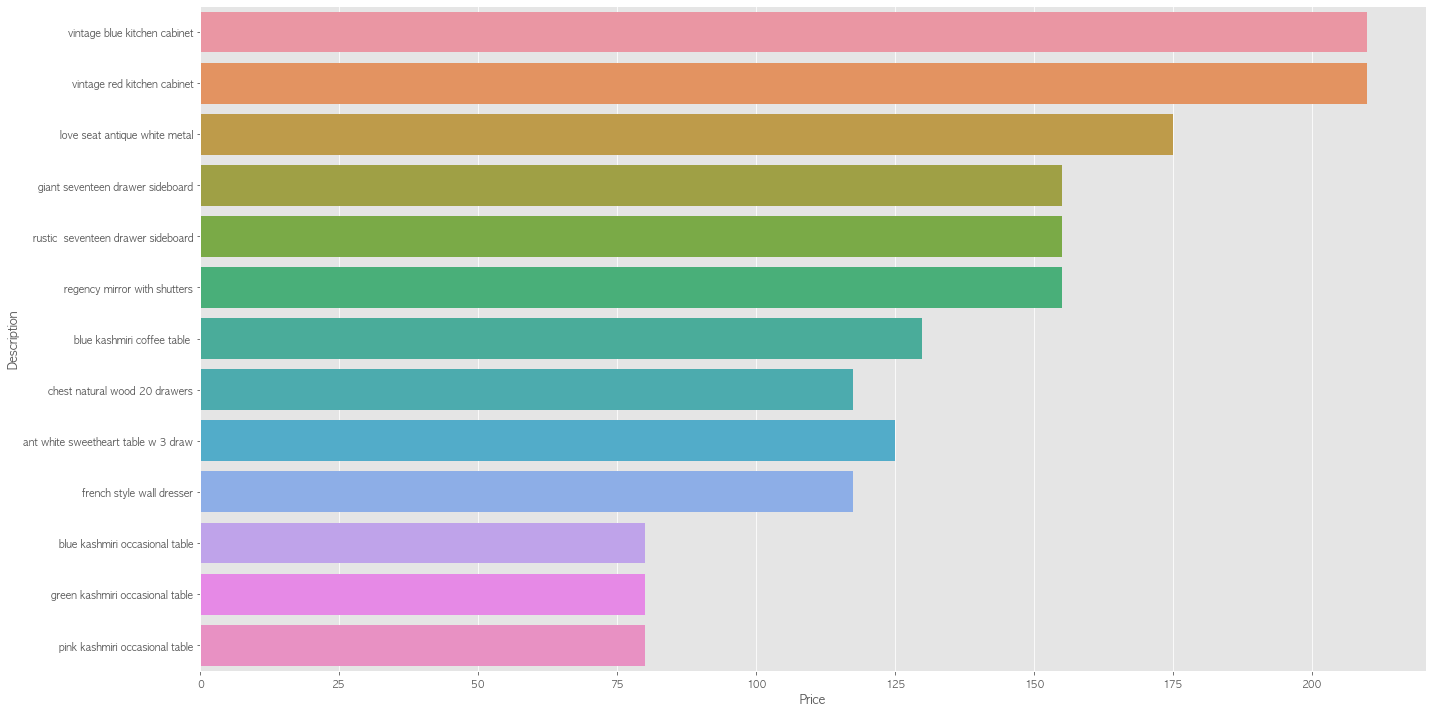

In [35]:
description = RFM_data[['Description', 'Price']].groupby(['Description','Price']).count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x=description.sort_values('Price', ascending=False)['Price'][:20],
            y=description.sort_values('Price', ascending=False)['Description'][:20],
            orient='h', ci=None)
save_fig("most_expensive_product")
plt.show();

- 가장 비싼 상품 by Customer Segments

그림 저장: most_expensive_product_by_segments


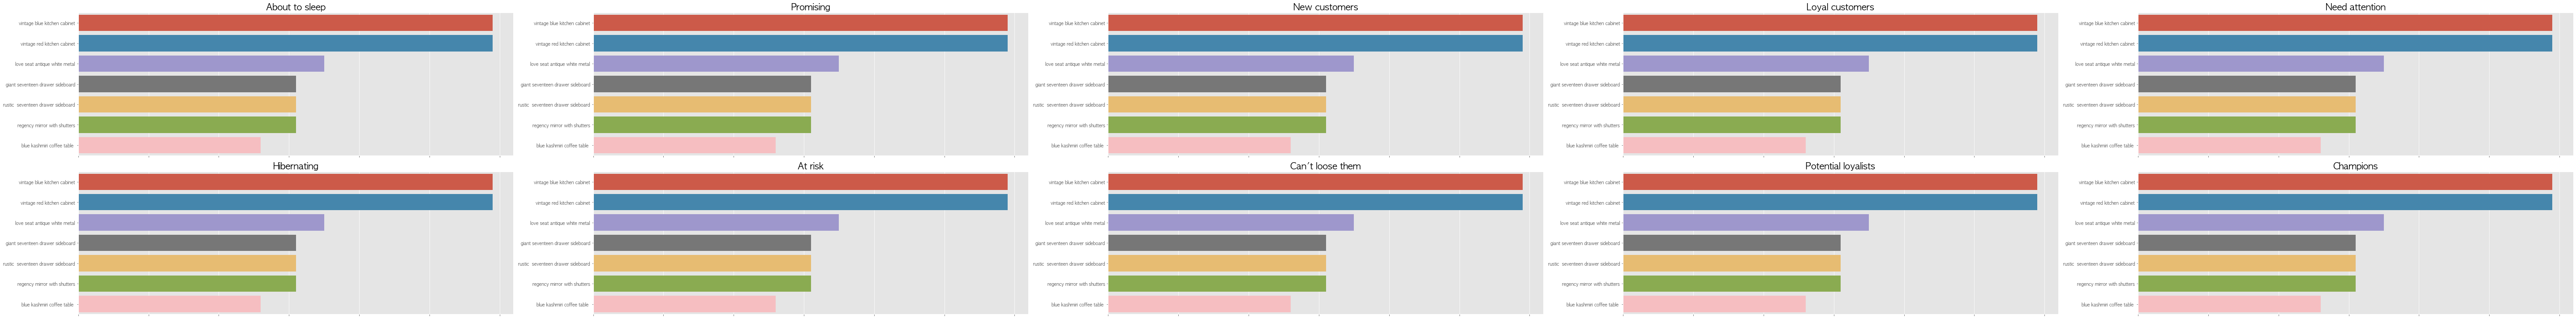

In [36]:
fig, ax = plt.subplots(2, 5, figsize=(80, 10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

for idx, var in enumerate(RFM_data['segment'].unique()):
    df = RFM_data[RFM_data['segment'] == var]
    
    
    i = idx % 2
    j = idx % 5
    
    sns.barplot(x=description.sort_values('Price', ascending=False)['Price'][:10],
                y=description.sort_values('Price', ascending=False)['Description'][:10],
                orient='h', ci=None, ax = ax[i][j]).set_title(f'{var}'.format(), fontsize=20)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=30, size=15)
    ax[i][j].set_xlabel("")
    ax[i][j].set_ylabel("")
    
save_fig("most_expensive_product_by_segments")
plt.show();

- 가장 많은 빈도 수의 단어

In [37]:
def nn_words(df):
    word_tokens = df['Description'].apply(lambda x : nltk.word_tokenize(x))
    tokens_pos = word_tokens.swifter.apply(lambda x :nltk.pos_tag(x))
    NN_words = []
    
    for i in range(len(tokens_pos)):
        for word, pos in tokens_pos.iloc[i]:
            if 'NN' in pos:
                NN_words.append(word)                
    return NN_words

In [38]:
def remove_stopwords(word_list):
    words = set(word_list)
    
    for word in tqdm(words):
        if word in stopwords_list:
            while word in word_list : word_list.remove(word)
    return word_list

In [39]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return cw

In [40]:
stopwords_list = stopwords.words('english')
NN_words = nn_words(RFM_data)
without_stopwords = remove_stopwords(NN_words)
cw = common_words(without_stopwords, 50)

Pandas Apply:   0%|          | 0/380812 [00:00<?, ?it/s]

100%|██████████| 1739/1739 [00:26<00:00, 65.21it/s]


100%|██████████| 1110626/1110626 [03:49<00:00, 4832.54it/s]


그림 저장: most_common_words_wordcloud


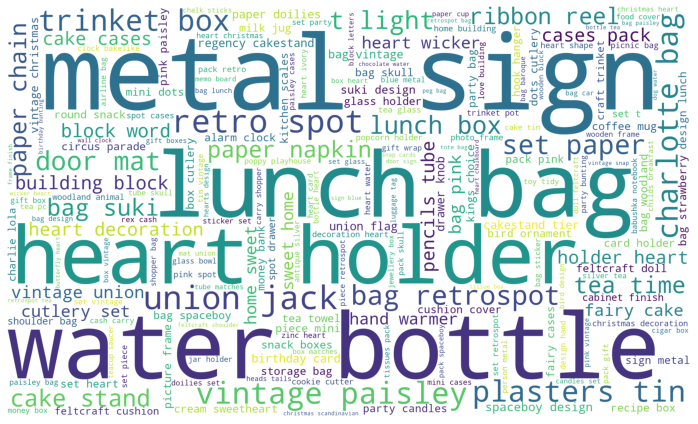

In [41]:
noun_text = ''
for word in tqdm(without_stopwords):
    noun_text = noun_text + ' ' + word

wc= WordCloud(width=2000, height=1200, background_color ='white', min_font_size = 10).generate(noun_text)

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
save_fig("most_common_words_wordcloud")
plt.show()

- 가장 많은 빈도 수의 단어 by Customer Segments

Pandas Apply:   0%|          | 0/40342 [00:00<?, ?it/s]

100%|██████████| 1529/1529 [00:00<00:00, 5114.22it/s]


Pandas Apply:   0%|          | 0/26513 [00:00<?, ?it/s]

100%|██████████| 1475/1475 [00:00<00:00, 18587.92it/s]


Pandas Apply:   0%|          | 0/143363 [00:00<?, ?it/s]

100%|██████████| 1680/1680 [00:07<00:00, 230.74it/s]


Pandas Apply:   0%|          | 0/57857 [00:00<?, ?it/s]

100%|██████████| 1596/1596 [00:01<00:00, 1516.04it/s]


Pandas Apply:   0%|          | 0/11822 [00:00<?, ?it/s]

100%|██████████| 1289/1289 [00:00<00:00, 54934.74it/s]


Pandas Apply:   0%|          | 0/28647 [00:00<?, ?it/s]

100%|██████████| 1464/1464 [00:00<00:00, 10928.46it/s]


Pandas Apply:   0%|          | 0/40910 [00:00<?, ?it/s]

100%|██████████| 1498/1498 [00:00<00:00, 4476.48it/s]


Pandas Apply:   0%|          | 0/11385 [00:00<?, ?it/s]

100%|██████████| 1284/1284 [00:00<00:00, 68943.93it/s]


Pandas Apply:   0%|          | 0/17159 [00:00<?, ?it/s]

100%|██████████| 1328/1328 [00:00<00:00, 30233.98it/s]


Pandas Apply:   0%|          | 0/2814 [00:00<?, ?it/s]

100%|██████████| 920/920 [00:00<00:00, 326570.72it/s]


그림 저장: most_common_words_by_segments


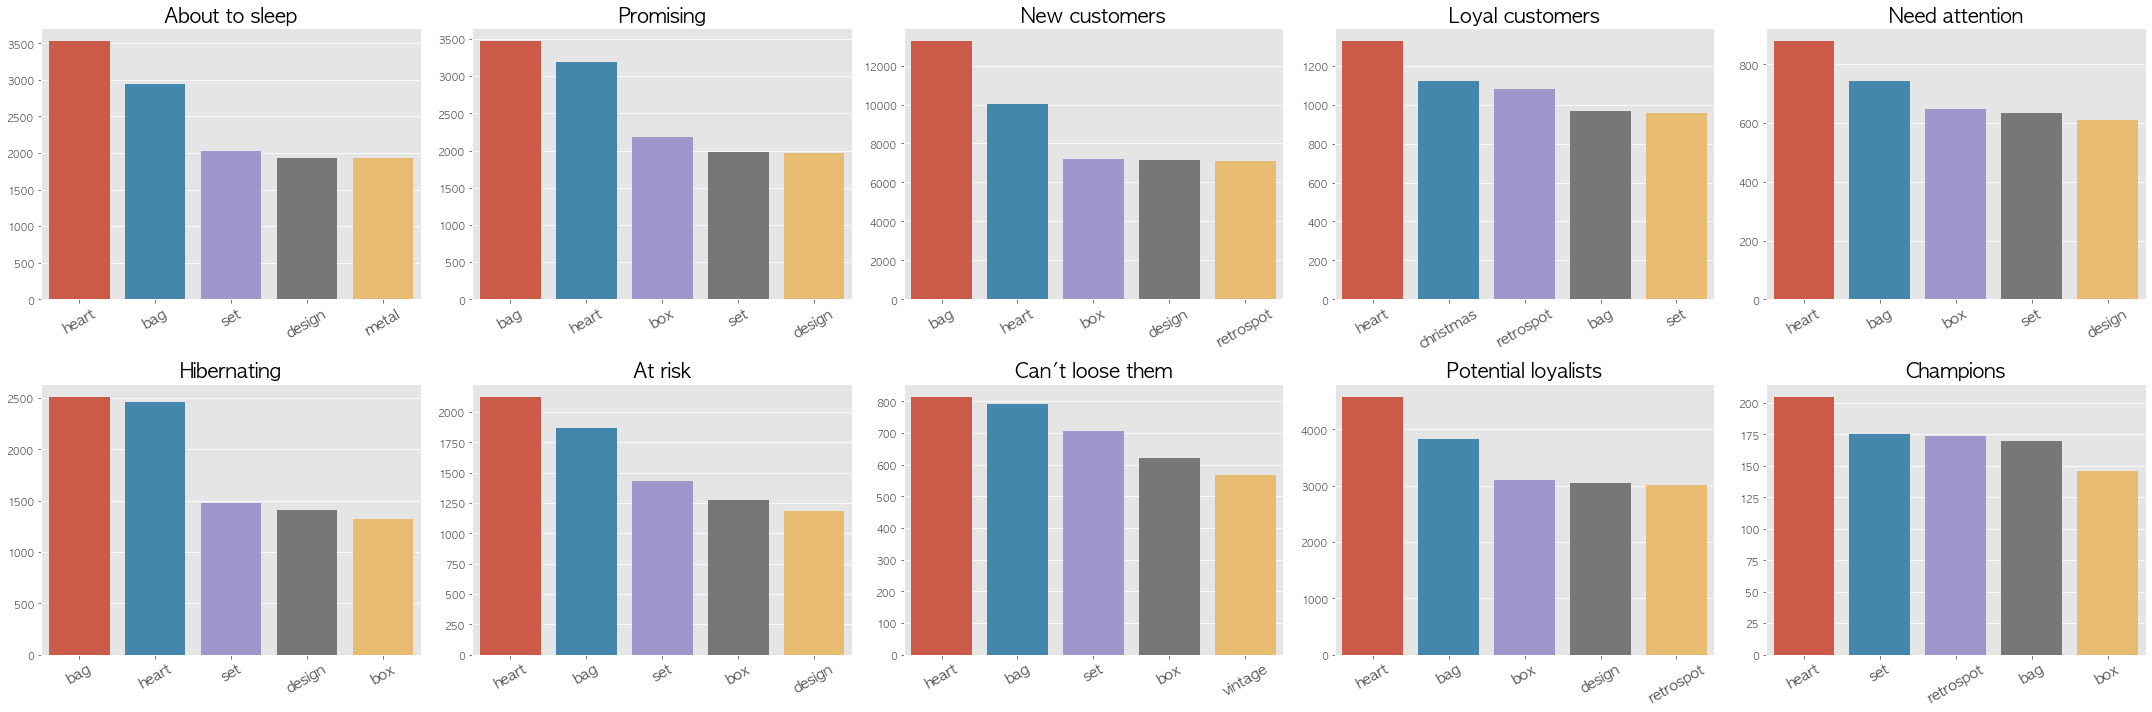

In [42]:
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

for idx, var in enumerate(RFM_data['segment'].unique()):
    df = RFM_data[RFM_data['segment'] == var]
    
    NN_words = nn_words(df)
    without_stopwords = remove_stopwords(NN_words)
    cw = common_words(without_stopwords, 5)
    common_words_df = pd.DataFrame(cw, columns=['noun', 'counts'])
    
    i = idx % 2
    j = idx % 5
    
    sns.barplot(common_words_df['noun'], common_words_df['counts'], ax = ax[i][j]).set_title(f'{var}'.format(), fontsize=20)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=30, size=15)
    ax[i][j].set_xlabel("")
    ax[i][j].set_ylabel("")
   
save_fig("most_common_words_by_segments")
plt.show();

## Country

- 거래가 가장 많은 국가

그림 저장: country_most_transaction


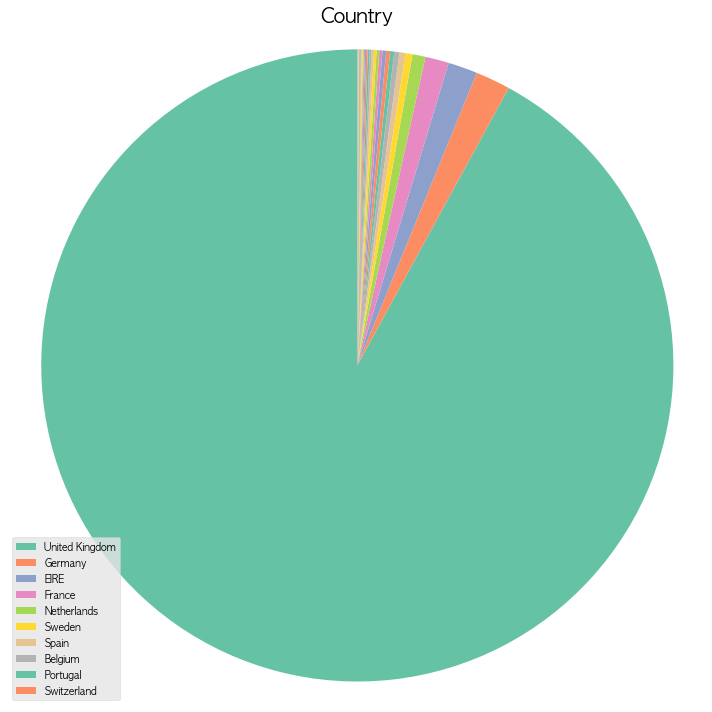

In [43]:
country = RFM_data[['Invoice', 'Country', 'Customer ID']].groupby(['Customer ID', 'Country', 'Invoice']).count().reset_index()

plt.figure(figsize=(10, 10))
plt.pie(country['Country'].value_counts(),
         textprops={'fontsize': 15},
         pctdistance=0.3,
         startangle=90,
         colors=sns.color_palette("Set2"))
plt.title("Country", fontsize=20)
plt.axis('equal') 
plt.legend(country['Country'].value_counts()[:10].index, loc='lower left', fontsize=10)
save_fig("country_most_transaction")
plt.show();

In [48]:
data = dict(type='choropleth',
locations = country['Country'].value_counts().index,
locationmode = 'country names', z = country['Country'].value_counts(),
text = country['Country'].value_counts().index, colorbar = {'title':'Order no.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

- 구매액이 가장 많은 국가 (log)

그림 저장: country_most_revenue


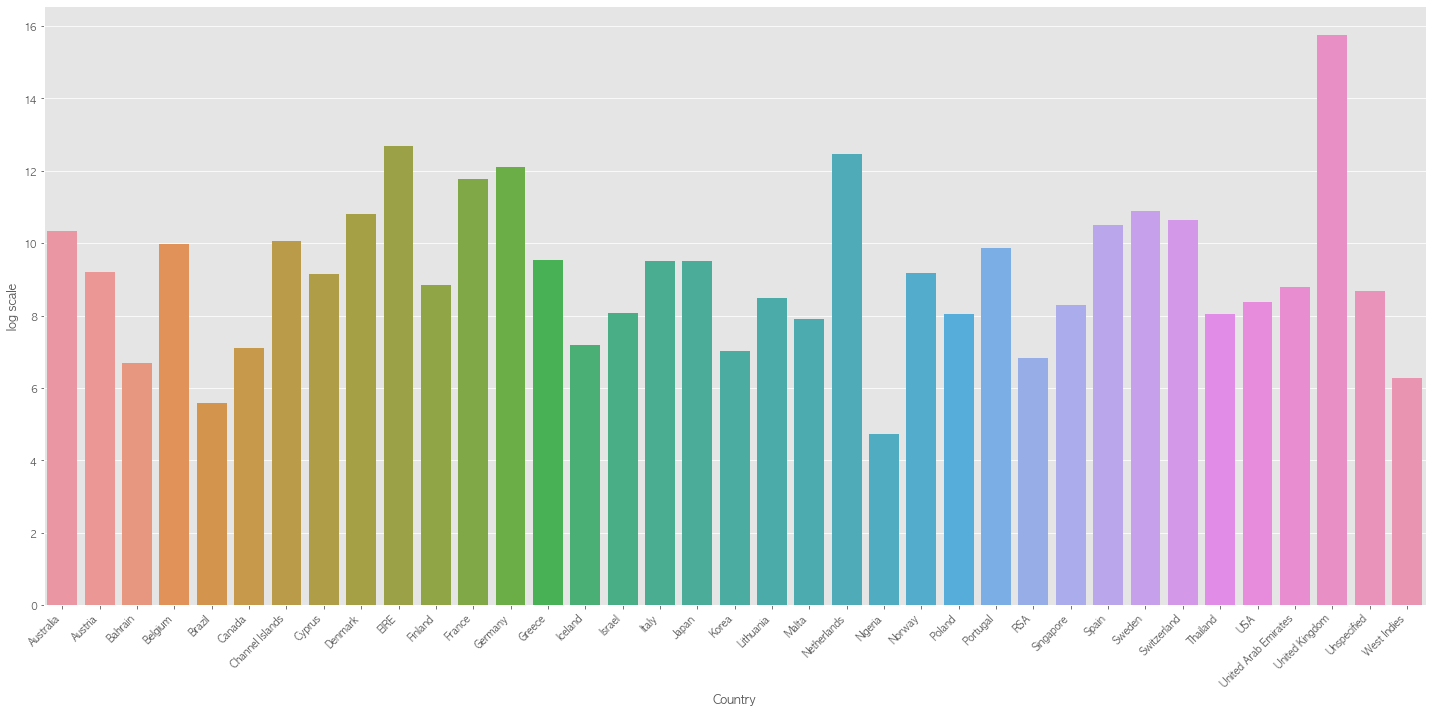

In [49]:
country_total = RFM_data[['total_price', 'Country', 'Customer ID']].groupby(['Country']).sum().reset_index()

plt.figure(figsize=(20,10))
plot = sns.barplot(x=country_total['Country'], y=np.log(country_total['total_price']))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("log scale", rotation=90)
save_fig("country_most_revenue")
plt.show();

- 1인당 평균 구매액이 가장 많은 국가 (log)

그림 저장: country_most_average_revenue_per_user


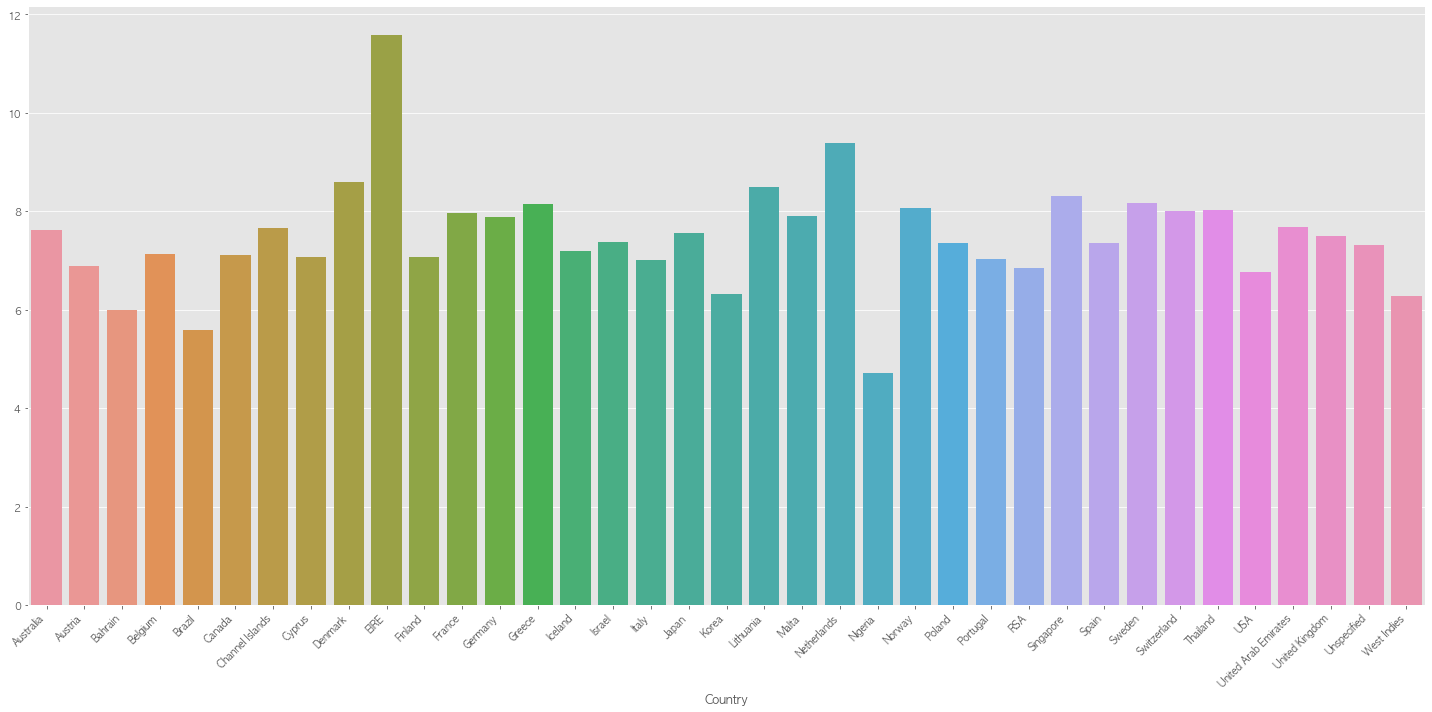

In [50]:
country_average = RFM_data.groupby(['Country']).sum()['total_price'] / RFM_data.groupby(['Country']).nunique()['Customer ID']
plt.figure(figsize=(20,10))
plot = sns.barplot(x=country_average.index, y=np.log(country_average))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
save_fig("country_most_average_revenue_per_user")
plt.show();

- EIRE 1인당 평균 구매액 vs 전체 1인당 평균 구매액

In [56]:
EIRE = RFM_data[RFM_data['Country'] == 'EIRE']
tmp = pd.DataFrame()
tmp['name'] = ['EIRE', 'All']
tmp['average'] = [EIRE['total_price'].sum() / EIRE['Customer ID'].nunique(), RFM_data['total_price'].sum() / RFM_data['Customer ID'].nunique()]


그림 저장: EIRE_vs_all


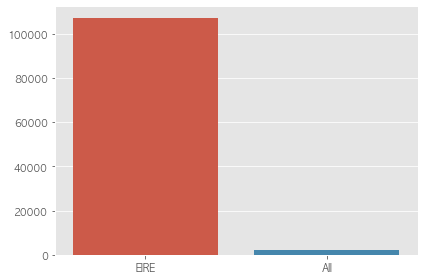

In [57]:
sns.barplot(tmp['name'], tmp['average'])
plt.xlabel("")
plt.ylabel("")
save_fig("EIRE_vs_all")
plt.show();

- 거래액이 가장 많은 국가 by Customer segments

그림 저장: Country_without_UK


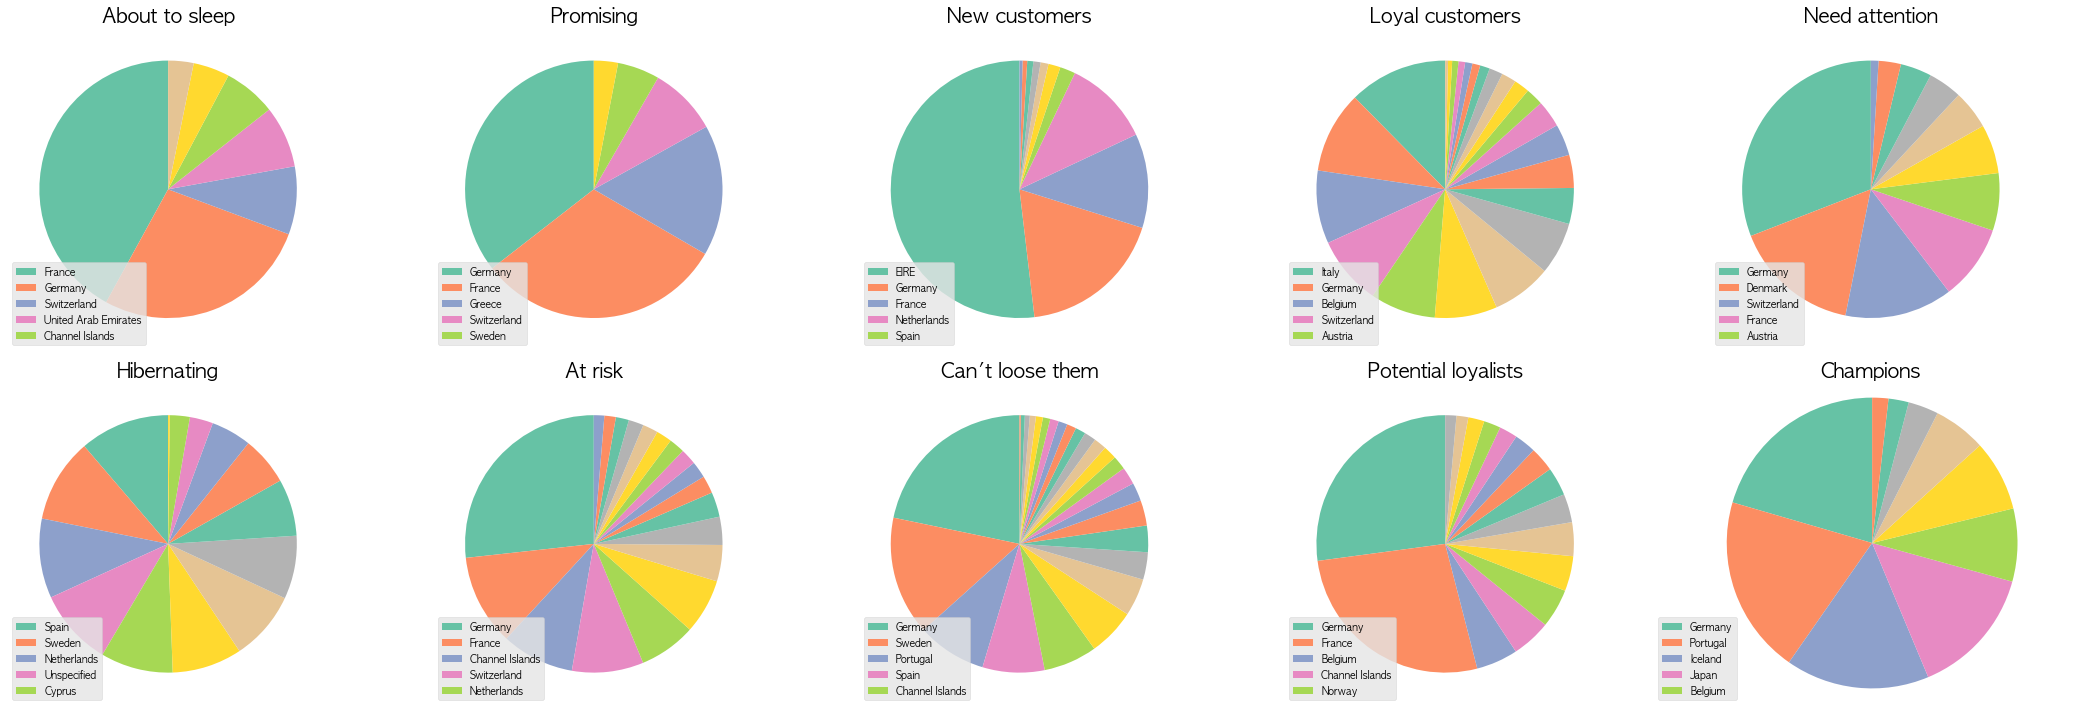

In [58]:
fig, ax = plt.subplots(2, 5, figsize=(30, 10))

for idx, var in enumerate(RFM_data['segment'].unique()):
    df = RFM_data[RFM_data['segment'] == var]
    df = df[df['Country'] != 'United Kingdom']
    i = idx % 2
    j = idx % 5
    
    ax[i][j].pie(df['Country'].value_counts(),
             textprops={'fontsize': 10},
             pctdistance=0.3,
             startangle=90,
             colors=sns.color_palette("Set2"))
    ax[i][j].set_title(f'{var}'.format(), fontsize=20)
    plt.axis('equal') 
    ax[i][j].legend(df['Country'].value_counts()[:5].index, loc='lower left', fontsize=10)

save_fig("Country_without_UK")
plt.show();

## date

In [59]:
RFM_data = RFM_data.astype({'hour':"int64"})

- 가장 거래과 구매액이 많은 날

In [ ]:
# column_list = ['month', 'day', 'weekday', 'hour']

# fig, ax = plt.subplots(2, figsize=(20, 20))
# i = 0

# for idx, var in enumerate(column_list):
#     i = 0
#     j = 0
#     i = i if idx < 2 else i + 1
#     j = j if idx % 2 == 0 else j + 1
    
#     df = RFM_data[['Invoice', 'year', var]].groupby(['Invoice', 'year', var]).count().reset_index()
    
#     sns.countplot(x=df[var], hue=df['year'], ax=ax[i][j]).set_title(f'{var}'.format(), fontsize=20)
#     ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=0, size=15)
#     ax[i][j].set_xlabel("")
#     ax[i][j].set_ylabel("")

# # save_fig("date analysis")
# # plt.show();

그림 저장: trmonth


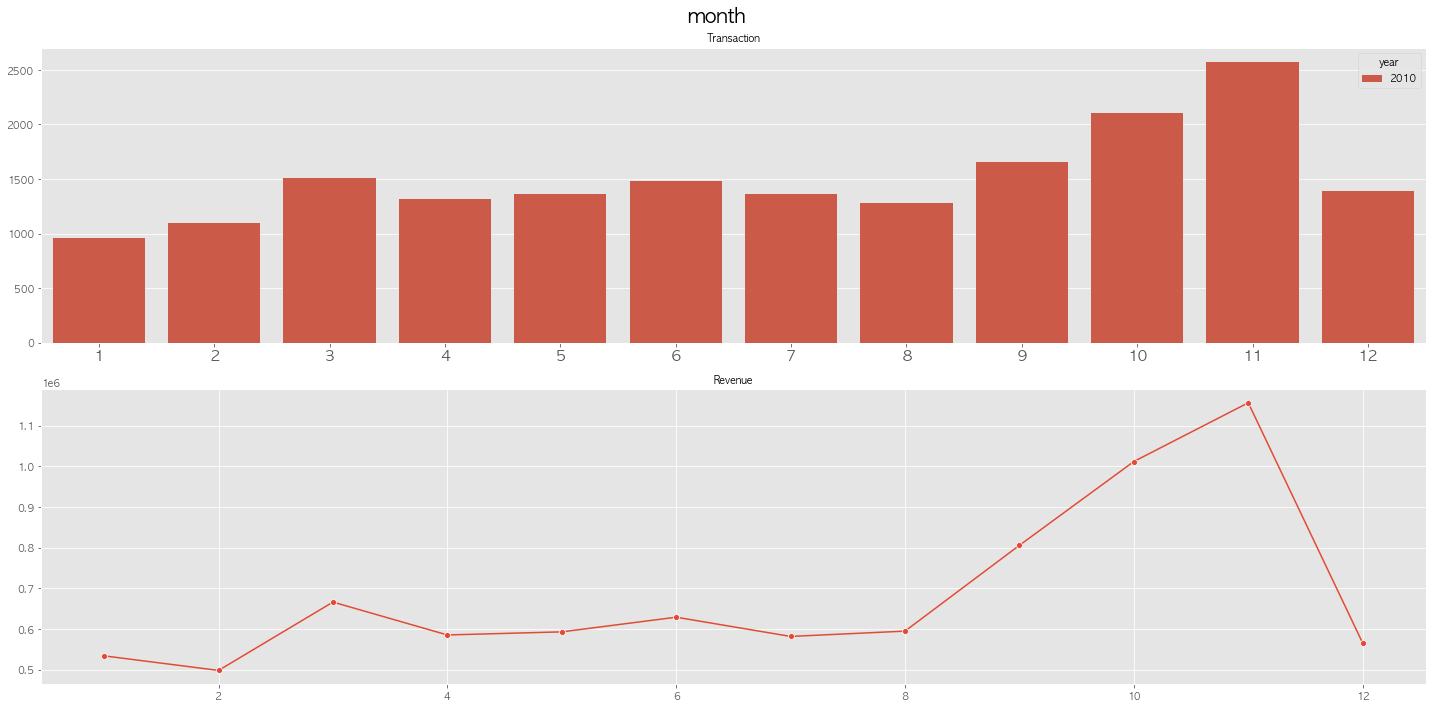

그림 저장: trday


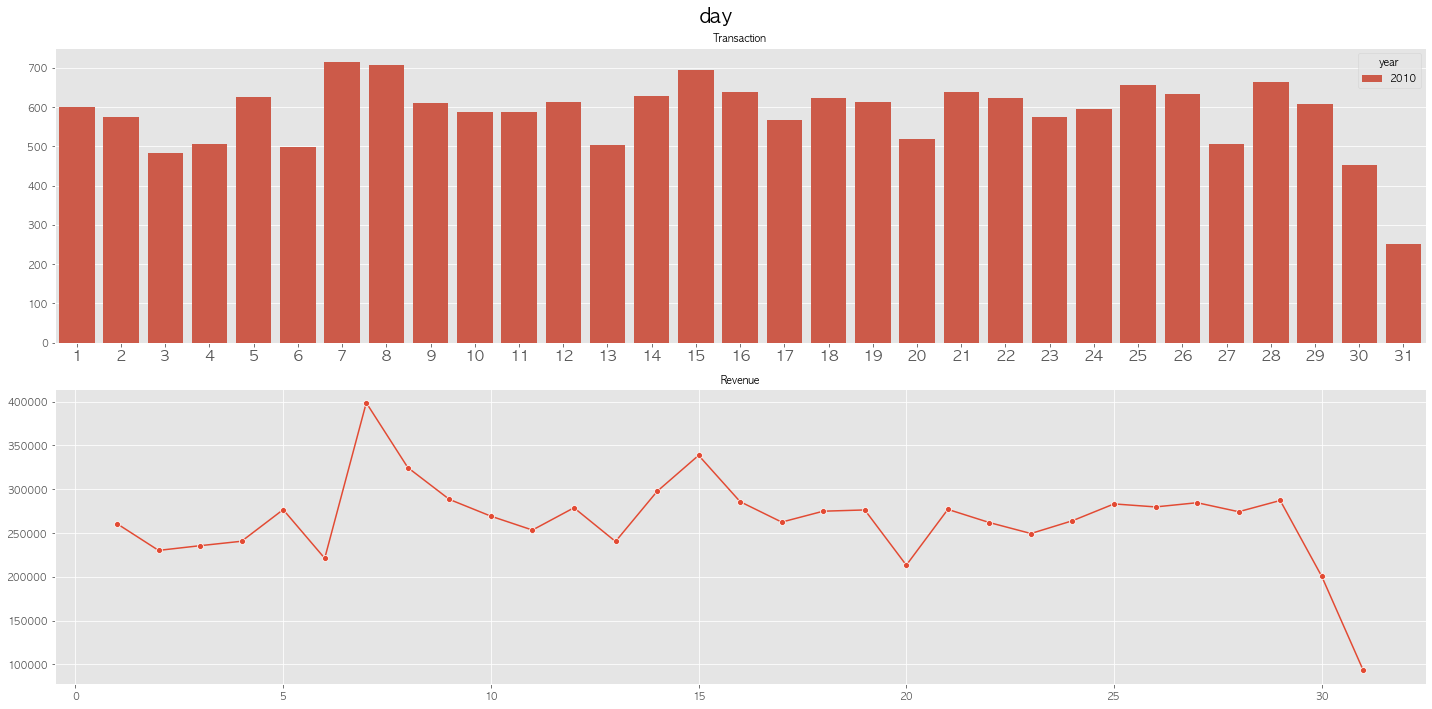

그림 저장: trweekday


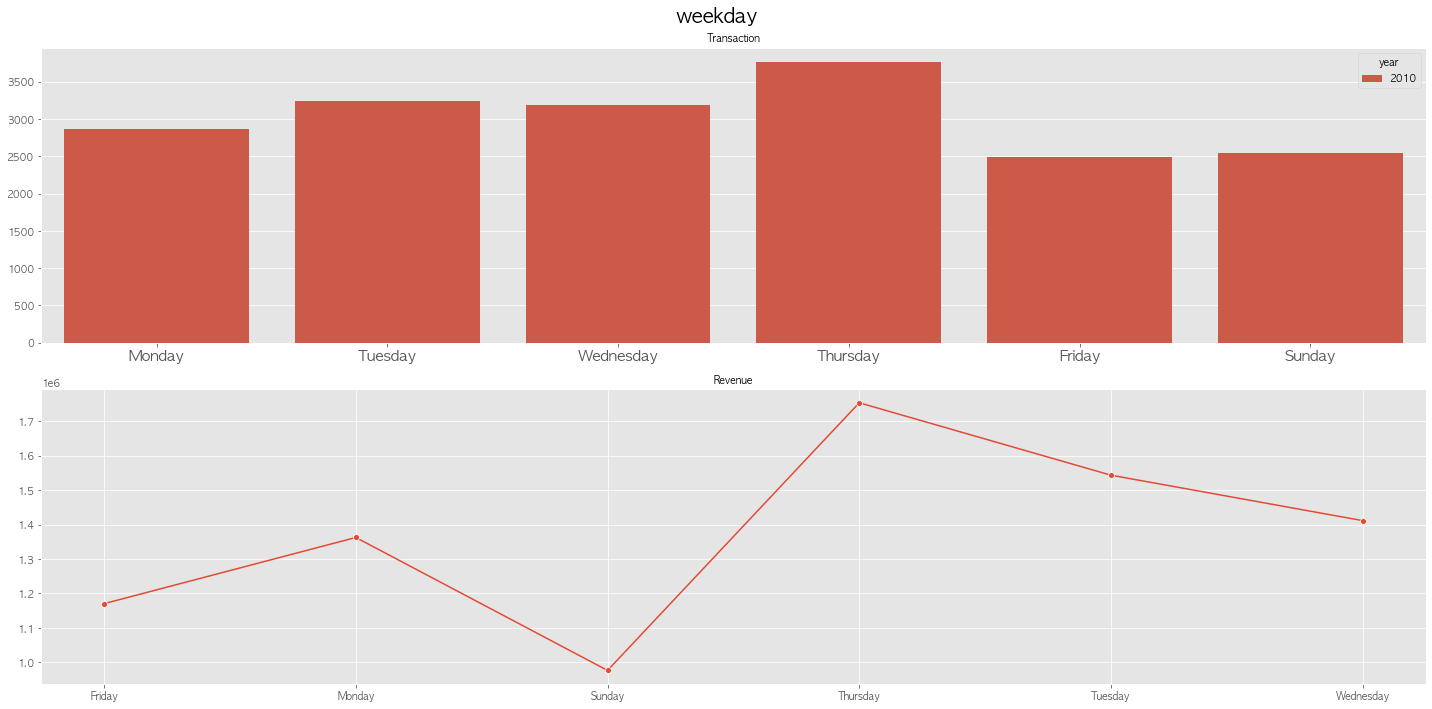

그림 저장: trhour


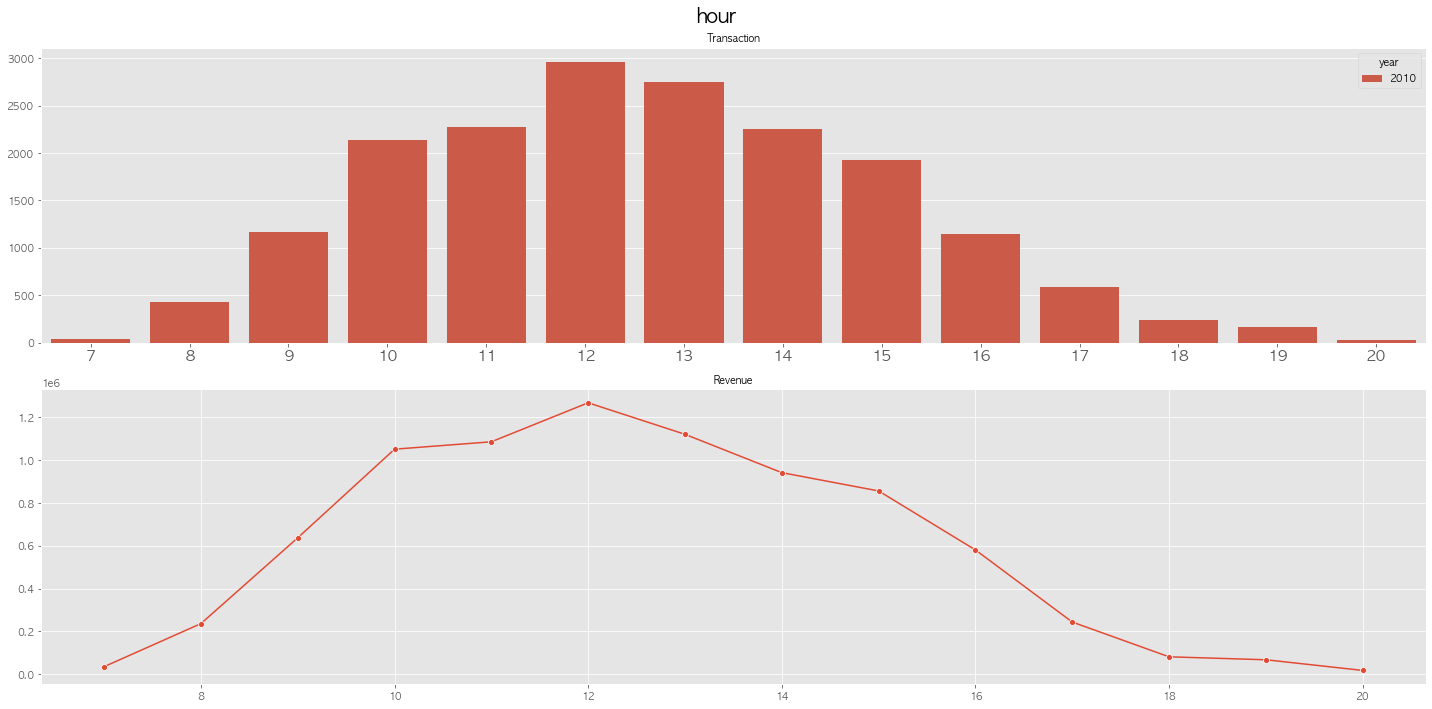

In [60]:
column_list = ['month', 'day', 'weekday', 'hour']

for idx, var in enumerate(column_list):
    fig, ax = plt.subplots(2, figsize=(20, 10))
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

    df1 = RFM_data[['Invoice', 'year', var]].groupby(['Invoice', 'year', var]).count().reset_index()
    df2 = RFM_data[['year', var, 'total_price']].groupby(['year', var])['total_price'].sum().reset_index()

    sns.countplot(x=df1[var], hue=df1['year'], ax=ax[0]).set_title("Transaction", fontsize=10)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("")

    sns.lineplot(x=df2[var], y=df2['total_price'], marker='o', ax=ax[1]).set_title("Revenue", fontsize=10)
    # ax[1].set_xticklabels(df2['month'].unique(), rotation=0, size=15)
    ax[1].set_xlabel("")
    ax[1].set_ylabel("")
    
    plt.suptitle(f'{var}'.format(), fontsize=20)
    save_fig("tr" + f"{var}".format())
    plt.show();

In [ ]:
df2[['total_price']].plot.area()

## Customer
### new customers

In [200]:
def get_unique_no(x):
    return len(np.unique(x))

In [201]:
RFM_data['cohort_month'] = RFM_data.groupby('Customer ID')['month'].transform('min')
RFM_data['cohort_index'] = RFM_data['month'] - RFM_data['cohort_month']
cohort = RFM_data.groupby(['cohort_month', 'cohort_index'])['Customer ID'].apply(get_unique_no).reset_index()
cohort_df = cohort.pivot(index="cohort_month", columns="cohort_index")
retention = cohort_df.div(cohort_df.iloc[:,0], axis=0)

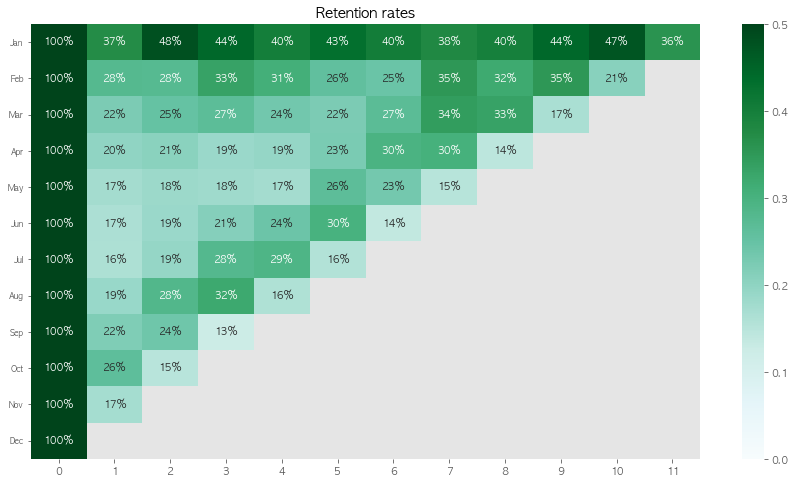

In [202]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')

xticks = np.arange(0, 12)
yticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sns.heatmap(data = retention,
#             xticklabels=xticks,
#             yticklabels=yticks,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn',
            xticklabels=xticks, yticklabels=yticks
           )
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
plt.xlabel("")
plt.ylabel("")
plt.show()